# Test of running the code for several dates

*JASaa*

*ISAE-SUPAERO*

## Load data and import functions

In [18]:
from eddies import load_netcdf4,eddy_detection,print_eddies,plot_eddies

#name of the netCDF data file
filename = 'Lebreton_2015.nc'
# Confidence level, usually 90%
R2_criterion = 0.9
# OW value at which to begin the evaluation of R2
OW_start = -1.0
# Number of local minima to evaluate using R2 method.
# Set low (like 20) to see a few R2 eddies quickly.
# Set high (like 1e5) to find all eddies in domain.
max_evaluation_points = 50
# Minimum number of cells required to be identified as an eddie.
min_eddie_cells = 1
# z-level to plot.  Usually set to 0 for the surface.
k_plot = 0

## Print the dates

In [19]:
#name of the netCDF data file
filename = 'Lebreton_2015.nc'

(f,lon,lat,depth,uvel,vvel,t) =  load_netcdf4(filename)

In [20]:
import datetime

def julianh2gregorian(time_hours,origin):
    return origin + datetime.timedelta(hours=time_hours)

origin_julian = datetime.date(1950, 1, 1) 

gregorian_dates = []
gregorian_str = []
for i in range(len(t)):
    gregorian_dates.append(julianh2gregorian(t[i],origin_julian))
    gregorian_str.append(str(gregorian_dates[i]))

print(gregorian_str)

['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11', '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15', '2015-07-16', '2015-07-17', '2015-07-18', '2015-07-19', '2015-07-20', '2015-07-21', '2015-07-22', '2015-07-23', '2015-07-24', '2015-07-25', '2015-07-26', '2015-07-27', '2015-07-28', '2015-07-29', '2015-07-30', '2015-07-31', '2015-08-01', '2015-08-02', '2015-08-03', '2015-08-04', '2015-08-05', '2015-08-06', '2015-08-07', '2015-08-08', '2015-08-09', '2015-08-10', '2015-08-11', '2015-08-12', '2015-08-13', '2015-08-14', '2015-08-15', '2015-08-16', '2015-08-17', '2015-08-18', '2015-08-19', '2015-08-20', '2015-08-21', '2015-08-22', '2015-08-23', '2015-08-24', '2015-08-25', '2015-08-26', '2015-08-27', '2015-08-28', '2015-08-29', '2015-08-30', '2015-08-31', '2015-09-01', '2015-09-02', '2015-09-03', '2015-09-04', '2015-09-05', '2015-09-06', '2015-09-07', '2015-09-08', '2015-09-09', '2015

## Run code for several days
We can start with a few eddies for a few day to test

In [21]:
%%capture

eddy_data = []
for day in range(len(t)):
    eddy_data.append(eddy_detection(lon,lat,depth,uvel,vvel,day,R2_criterion,OW_start,max_evaluation_points,min_eddie_cells)) 

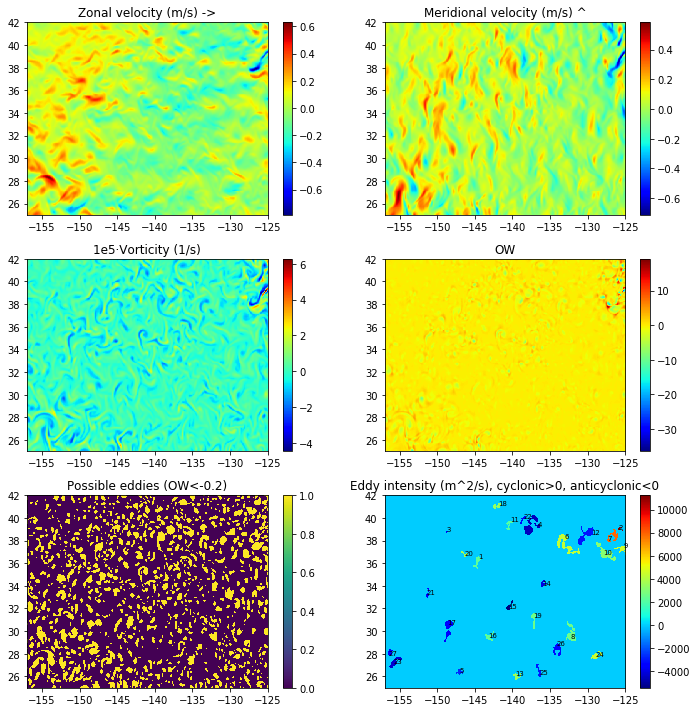

In [14]:
plot_eddies(lon,lat,uvel,vvel,vorticity,OW,OW_eddies,eddie_census,nEddies,intensity_mask,k_plot)

In [37]:
print_eddies(eddies[0],nEd[0])


Eddie census data

       minOW  circ(m^2/s)      lon(º)     lat(º)  cells  diameter(km)
1  -1.427870  4103.568091 -144.666672  26.500000  163.0    126.552236
2  -6.054050 -8476.969975 -125.666664  40.166668   67.0     75.436709
3  -2.957035 -5960.549725 -152.166672  26.833334   57.0     75.214458
4  -1.746821  4147.238264 -136.833328  34.833332   47.0     65.563228
5  -4.072392  4879.774636 -135.333328  36.166668   34.0     55.556810
6  -2.041891  4640.578106 -133.166672  38.250000  129.0    105.401685
7  -1.235912  3765.973345 -130.000000  28.833334   24.0     48.996907
8  -2.392594 -2466.213203 -125.000000  34.166668   32.0     54.633679
9  -1.320226 -2889.636186 -126.166664  25.416666  128.0    112.973302
10 -2.064764  3109.186968 -137.833328  29.083334   42.0     64.178998
11 -1.394017  2761.526939 -131.333328  25.333334   70.0     83.738827
12 -3.602509  3716.118449 -134.583328  40.750000   63.0     72.983413
13 -2.133142 -3764.564187 -145.833328  34.916668  189.0    130.869194


In [87]:
import numpy as np

# (lon,lat,uvel,vvel,vorticity,OW,OW_eddies,eddie_census,nEddies,cyclonic_mask,intensity_mask)
nEd = np.zeros(len(t),dtype=int)
n_cyclonic = np.zeros(len(t),dtype=int)
eddies = []
for day in range(len(t)):
    nEd[day] = eddy_data[day][8] #count the number of eddies for each day with circ>0 for each day
    eddies.append(eddy_data[day][7])
    n_cyclonic[day] = sum(circ > 0. for circ in eddies[day][1]) #count the number of eddies with circ>0 for each day

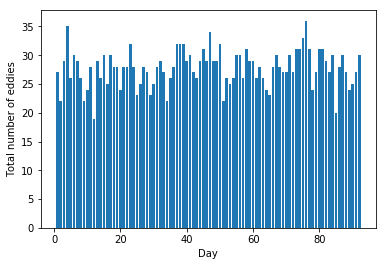

In [88]:
import matplotlib.pyplot as plt

plt.bar(np.arange(1,93),nEd)
plt.ylabel('Total number of eddies')
plt.xlabel('Day')
plt.show()

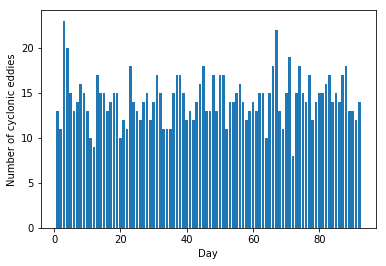

In [89]:
import matplotlib.pyplot as plt

plt.bar(np.arange(1,93),n_cyclonic)
plt.ylabel('Number of cyclonic eddies')
plt.xlabel('Day')
plt.show()

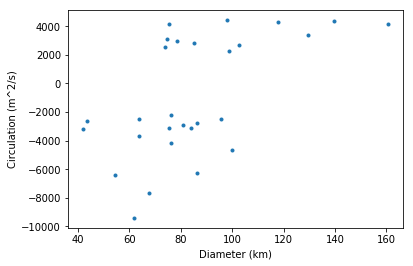

In [86]:
import matplotlib.pyplot as plt
#plot of circulation vs diameter for a certain day

plt.plot(eddies[20][5,:nEd[20]],eddies[20][1,:nEd[20]],'.')
plt.xlabel('Diameter (km)')
plt.ylabel('Circulation (m^2/s)')
plt.show()

In [82]:
eddies[50][5,:nEd[50]]

array([145.75274715,  85.29670046, 191.04056101,  59.87063124,
        81.30418299,  64.61690655,  85.65067285,  87.60584069,
        52.75406519,  63.91052584,  55.39048476,  35.47892886,
        73.07136941,  54.92806439,  37.41582972, 187.75420484,
        86.17405299, 123.09646786, 116.57700174,  35.18562219,
        85.20980567,  65.95922777])

In [67]:
nEd[50]

array([27, 22, 29, 35, 26, 30, 29, 26, 22, 24, 28, 19, 29, 26, 30, 25, 30,
       28, 28, 24, 28, 28, 32, 28, 23, 25, 28, 27, 23, 25, 28, 29, 27, 22,
       26, 28, 32, 32, 32, 29, 30, 27, 26, 29, 31, 29, 34, 29, 29, 32, 22,
       26, 25, 26, 30, 30, 26, 31, 29, 29, 26, 28, 26, 24, 23, 28, 30, 28,
       27, 27, 30, 27, 31, 31, 33, 36, 31, 24, 27, 31, 31, 29, 27, 30, 20,
       28, 30, 27, 24, 25, 27, 30])